<h1>Import Library</h1>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set Warning
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

<h2>Memasukkan Database </h2>

In [36]:
filename = "disney.csv"
db = pd.read_csv(filename, encoding='latin-1')
db.head()

film_name  film_year         author_name  review_date  score  \
0  Peter pan       1953        SpencerDeane  26 Jun 2018      9   
1  Peter pan       1953        AdrianaAdams  20 May 2015     10   
2  Peter pan       1953       lukeduke20164  10 Oct 2018      8   
3  Peter pan       1953  witch-nikki-porras  14 Jul 2013      0   
4  Peter pan       1953       sarah-tranter  27 Dec 2004      7   

                   title_name  \
0                Pretty great   
1           childhood classic   
2                    Awesome!   
3                 Racial Song   
4  One of Disney's classics!!   

                                         review_text    POU  
0  This is a great classic for all ages. I recomm...   0.00  
1  A childhood classic that is still enjoyable to...  33.33  
2  Nice movie! It has that animation that is kind...   0.00  
3  The song "What makes a Red Man Red?" IS terrib...  11.11  
4                                                NaN  40.00

<h2>Memilih kolom yang akan dianalisis</h2>

In [37]:
db.drop(columns=['film_name','film_year','title_name','author_name','review_date','POU'], inplace=True)
db.columns = ['score','review_text']
db.head()

score                                        review_text
0      9  This is a great classic for all ages. I recomm...
1     10  A childhood classic that is still enjoyable to...
2      8  Nice movie! It has that animation that is kind...
3      0  The song "What makes a Red Man Red?" IS terrib...
4      7                                                NaN

<h2>Preprocessing Data</h2>

Cleaning text

In [38]:
import string
import re

In [39]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
db['review_text'] = db['review_text'].fillna('')
db['cleaned_text'] = db['review_text'].apply(lambda x: clean_text(x))
db['label'] = db['score'].map({0.0:0, 1.0:0, 2.0:0, 3.0:0, 4.0:0, 5.0:0, 6.0:1, 7.0:1, 8.0:1, 9.0:1, 10.0:1})

<b>Memberikan Fitur Tambahan :</b><br>
-length of<br>
-Persentase tanda baca dalam text<br>

In [40]:
def count_punct(text):
    if len(text) == 0 or (len(text) - text.count(" ")) == 0:
        return 0
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
db['review_text_len'] = db['review_text'].apply(lambda x: len(x) - x.count(" "))
db['punct'] = db['review_text'].apply(lambda x: count_punct(x))
db.head()

score                                        review_text  \
0      9  This is a great classic for all ages. I recomm...   
1     10  A childhood classic that is still enjoyable to...   
2      8  Nice movie! It has that animation that is kind...   
3      0  The song "What makes a Red Man Red?" IS terrib...   
4      7                                                      

                                        cleaned_text  label  review_text_len  \
0  this is a great classic for all ages  i recomm...      1               59   
1  a childhood classic that is still enjoyable to...      1              505   
2  nice movie  it has that animation that is kind...      1              215   
3  the song  what makes a red man red   is terrib...      0              508   
4                                                         1                0   

   punct  
0    3.4  
1    2.4  
2    4.2  
3    5.9  
4    0.0

<h3>Membuat Kalimat Menjadi perkata</h3>

In [41]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
db['perkata'] = db['cleaned_text'].apply(lambda x: tokenize_text(x))
db.head()

score                                        review_text  \
0      9  This is a great classic for all ages. I recomm...   
1     10  A childhood classic that is still enjoyable to...   
2      8  Nice movie! It has that animation that is kind...   
3      0  The song "What makes a Red Man Red?" IS terrib...   
4      7                                                      

                                        cleaned_text  label  review_text_len  \
0  this is a great classic for all ages  i recomm...      1               59   
1  a childhood classic that is still enjoyable to...      1              505   
2  nice movie  it has that animation that is kind...      1              215   
3  the song  what makes a red man red   is terrib...      0              508   
4                                                         1                0   

   punct                                            perkata  
0    3.4  [this, is, a, great, classic, for, all, ages, ...  
1    2.4  [a, childhood, classic, that, is, still, enjoy...  
2    4.2  [nice, movie, it, has, that, animation, that, ...  
3    5.9  [the, song, what, makes, a, red, man, red, is,...  
4    0.0                                                 []

<b>Mengubah kata makna menjadi kata biasa(kata tak bermakna) dan mengfiltering data frame</b>

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
db['lemmatized_review'] = db['perkata'].apply(lambda x: lemmatize_text(x))
db.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


score                                        review_text  \
0      9  This is a great classic for all ages. I recomm...   
1     10  A childhood classic that is still enjoyable to...   
2      8  Nice movie! It has that animation that is kind...   
3      0  The song "What makes a Red Man Red?" IS terrib...   
4      7                                                      

                                        cleaned_text  label  review_text_len  \
0  this is a great classic for all ages  i recomm...      1               59   
1  a childhood classic that is still enjoyable to...      1              505   
2  nice movie  it has that animation that is kind...      1              215   
3  the song  what makes a red man red   is terrib...      0              508   
4                                                         1                0   

   punct                                            perkata  \
0    3.4  [this, is, a, great, classic, for, all, ages, ...   
1    2.4  [a, childhood, classic, that, is, still, enjoy...   
2    4.2  [nice, movie, it, has, that, animation, that, ...   
3    5.9  [the, song, what, makes, a, red, man, red, is,...   
4    0.0                                                 []   

                                   lemmatized_review  
0          great classic age recommend film everyone  
1  childhood classic still enjoyable today year o...  
2  nice movie animation kind haunting totally cla...  
3  song make red man red terrible make sick anger...  
4

<h2>Membuat EDA</h2>

In [44]:
print(f"Input data has {len(db)} rows and {len(db.columns)} columns")
print(f"score 0.0 = {len(db[db['score']==0.0])} rows")
print(f"score 1.0 = {len(db[db['score']==1.0])} rows")
print(f"score 2.0 = {len(db[db['score']==2.0])} rows")
print(f"score 3.0 = {len(db[db['score']==3.0])} rows")
print(f"score 4.0 = {len(db[db['score']==4.0])} rows")
print(f"score 5.0 = {len(db[db['score']==5.0])} rows")
print(f"score 6.0 = {len(db[db['score']==6.0])} rows")
print(f"score 7.0 = {len(db[db['score']==7.0])} rows")
print(f"score 8.0 = {len(db[db['score']==8.0])} rows")
print(f"score 9.0 = {len(db[db['score']==9.0])} rows")
print(f"score 10.0 = {len(db[db['score']==10.0])} rows")

Input data has 8455 rows and 8 columns
score 0.0 = 883 rows
score 1.0 = 230 rows
score 2.0 = 100 rows
score 3.0 = 146 rows
score 4.0 = 162 rows
score 5.0 = 313 rows
score 6.0 = 448 rows
score 7.0 = 814 rows
score 8.0 = 1151 rows
score 9.0 = 1229 rows
score 10.0 = 2979 rows


Number of null in label: 0
Number of null in text: 0


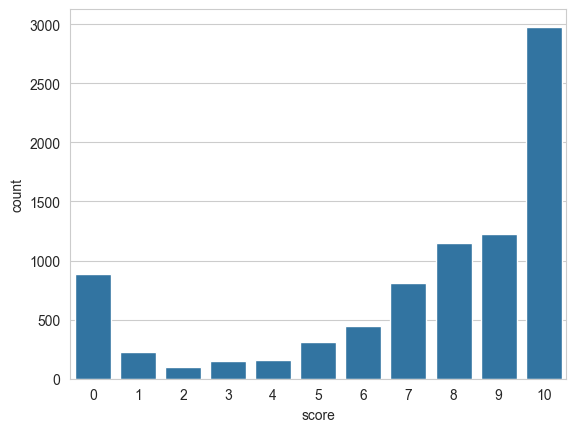

In [45]:
print(f"Number of null in label: { db['score'].isnull().sum() }")
print(f"Number of null in text: { db['review_text'].isnull().sum()}")
sns.countplot(x='score', data=db);

<h2>Visualisasi menggunakan Word Cloads</h2>

In [46]:
from wordcloud import WordCloud

In [47]:
db_negative = db[ (db['score']==0.0) | (db['score']==1.0) | (db['score']==2.0)| (db['score']==3.0)| (db['score']==4.0)  | (db['score']==5.0)]
db_positive = db[ (db['score']==6.0) | (db['score']==7.0) | (db['score']==8.0) | (db['score']==9.0) | (db['score']==10.0)]
#convert to list
negative_list=db_negative['lemmatized_review'].tolist()
positive_list= db_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

Word Cloud : Positive

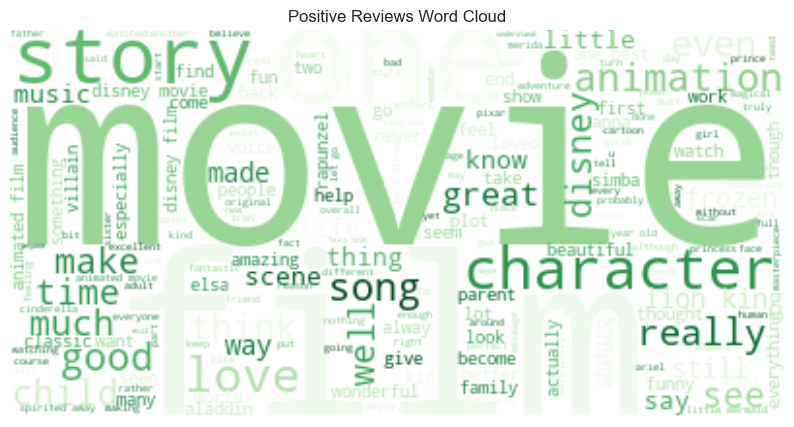

In [48]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

Word Cloud : Negative

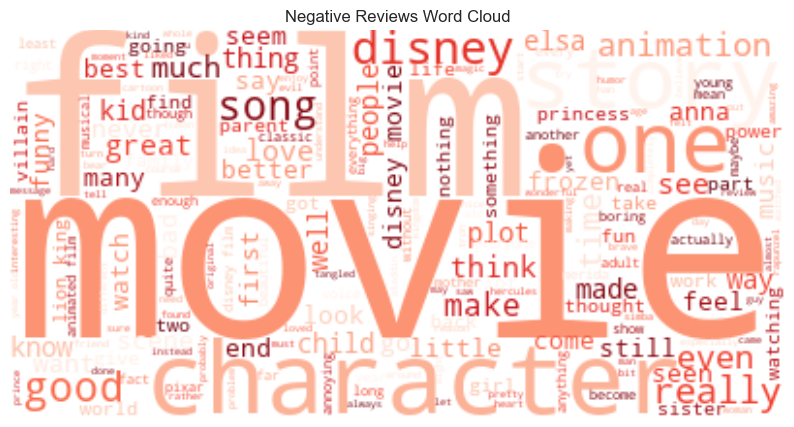

In [49]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

<h2>Mengekstrak Fitur dari text</h2>

In [50]:
X = db[['lemmatized_review', 'review_text_len', 'punct']]
y = db['label']
print(X.shape)
print(y.shape)

(8455, 3)
(8455,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6764, 3)
(1691, 3)
(6764,)
(1691,)


In [52]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf =  TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

review_text_len  punct    0    1    2    3    4    5    6    7    8    9  \
0              342    5.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1              175    1.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              528    4.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3              609    4.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              646    3.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25   26   27   28   29        30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.143159  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   51   52   53  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    54   55   56   57   58        59   60   61   62   63   64   65   66   67  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.311454  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    68   69   70   71   72   73   74   75   76   77   78   79   80   81   82  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    83   84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1

In [53]:
X_test_vect.head()

review_text_len  punct    0    1    2    3    4    5    6    7    8    9  \
0              477    3.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2              503    2.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4              397    4.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25   26   27   28   29   30   31   32   33   34   35   36   37   38   39  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    40   41   42   43   44   45   46   47   48   49   50   51   52   53   54  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    55   56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    70   71   72   73   74   75   76   77   78   79   80   81   82   83   84  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    85   86   87        88       89   90   91   92   93   94   95   96   97  \
0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.000000  0.12032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.177133  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0 

<h2>Visualize Confusion Matrix</h2>

->Vectorizer : TF-IDF

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Algoritma : Multinominal Naive Bayen

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       342
           1       0.80      1.00      0.89      1349

    accuracy                           0.80      1691
   macro avg       0.40      0.50      0.44      1691
weighted avg       0.64      0.80      0.71      1691



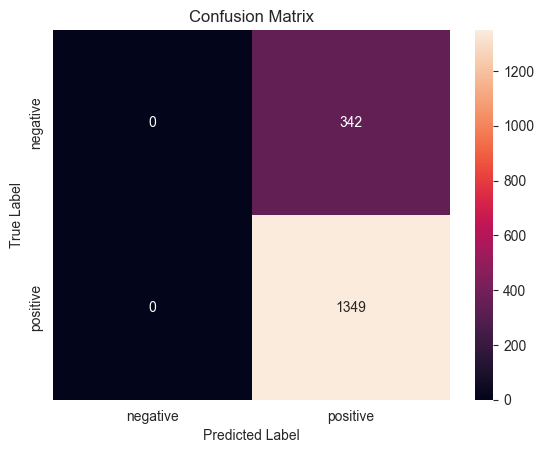

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
#Mengganti nama kolom menjadi string
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)


classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
db_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(db_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3>Performing K-Fold Cross Validation</h3>

In [58]:
from sklearn.model_selection import cross_val_score

models = [MultinomialNB()]
names = ["Naive Bayes"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()
     

Naive Bayes
 accuracy - 0.779420607798065 
 precision - 0.779586043544003 
 recall - 0.9996204933586338 
 f1 - 0.8759972478035827 



<h2>Prediction</h2><br>
    - Vectorizer : CountVectorizer (Bag of Words)<br>
    - Algoritma : Multinomial Naive Bayes<br>

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(db['lemmatized_review']) # Fit the Data
y_cv = db['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [60]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8092234923137565

In [61]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]
